# **K-means on images**

Use the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


In [ ]:
#Image segmentation from video using OpenCV and K-means clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

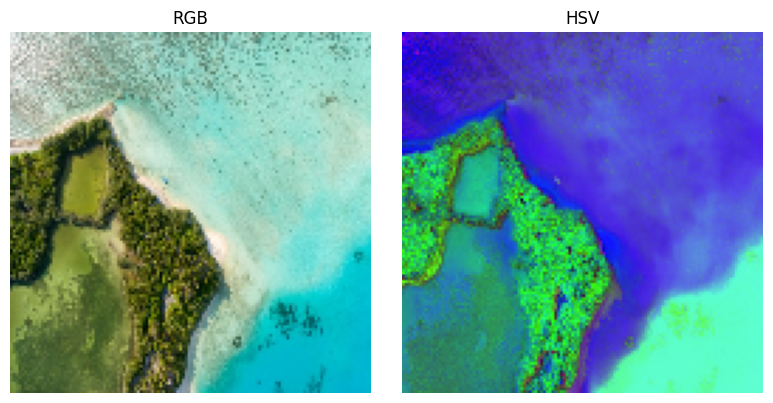

In [ ]:
original_image = cv2.imread("/content/image1.jpeg")

# Resize to a feasible size to avoid extensive computation
original_image = cv2.resize(original_image, (128, 128))


# Convert from BGR Color Space to HSV
img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("RGB")
axes[1].imshow(img_hsv), axes[1].set_axis_off(), axes[1].set_title("HSV")
plt.tight_layout()

In [50]:
# Vectorize to compute kmeans
vectorized_rgb = img_rgb.reshape((-1,3))
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = img_hsv[:,:,0].reshape((-1,1))
vectorized_hsv = np.float32(vectorized_hsv)

# Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)

(16384, 3) (16384, 1)


## **RGB image**

In [66]:
# Train kmeans
n = 4
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit(vectorized_rgb)

KMeans(n_clusters=4, random_state=0)

In [67]:
# Predict to segment regions
clustered_rgb = kmeans.predict(vectorized_rgb)
clustered_rgb = clustered_rgb.reshape([img_rgb.shape[0], img_rgb.shape[1]])


print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)

(16384, 3) (128, 128, 3) (128, 128)


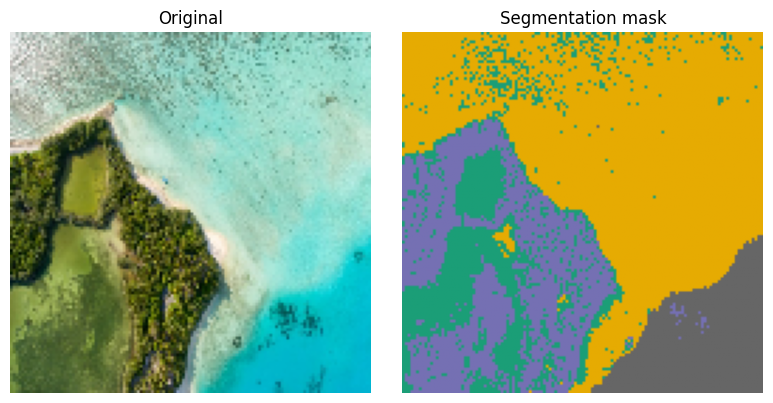

In [68]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_rgb, cmap="Dark2" ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

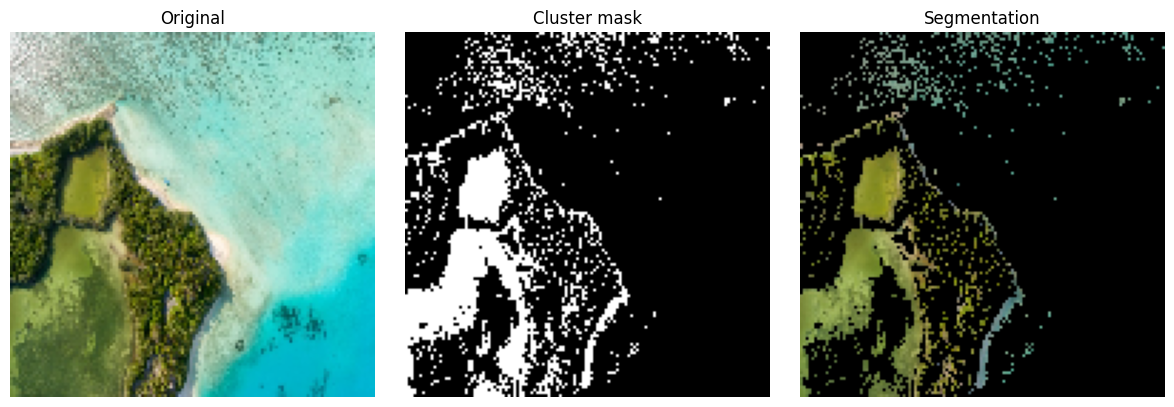

In [69]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

cluster_mask = np.array (clustered_rgb == cluster, dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask= cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **HSV image**

In [51]:
# Train kmeans
n = 4
kmeans = KMeans(n_clusters = n, random_state=0).fit( vectorized_hsv )

In [52]:
# Predict to segment regions
clustered_hsv = kmeans.predict(vectorized_hsv)
clustered_hsv = clustered_hsv.reshape([img_hsv.shape[0], img_hsv.shape[1]])

print(vectorized_hsv.shape, img_rgb.shape, clustered_hsv.shape)

(16384, 1) (128, 128, 3) (128, 128)


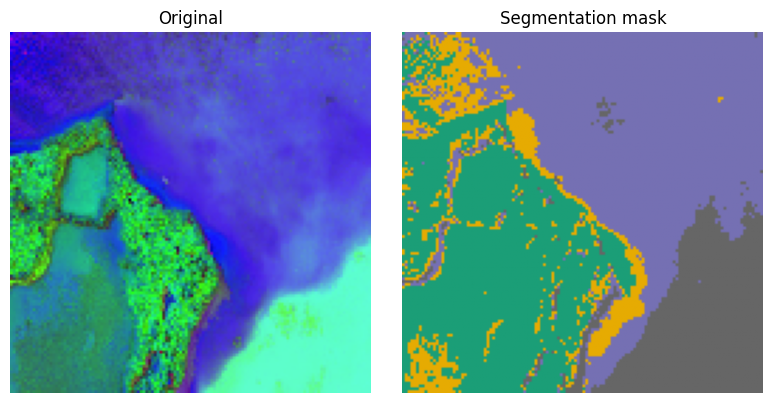

In [56]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_hsv, cmap='Dark2' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

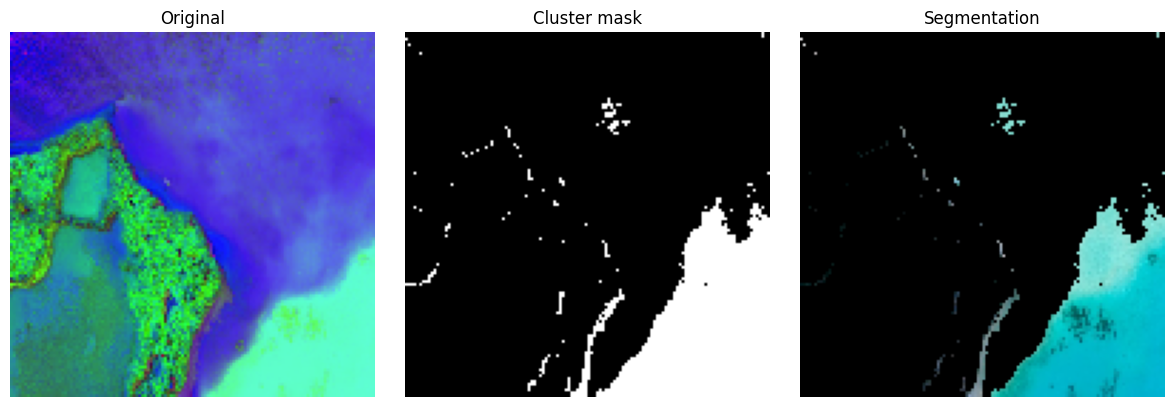

In [60]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 3

cluster_mask = np.array (clustered_hsv == cluster, dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **Comparison**

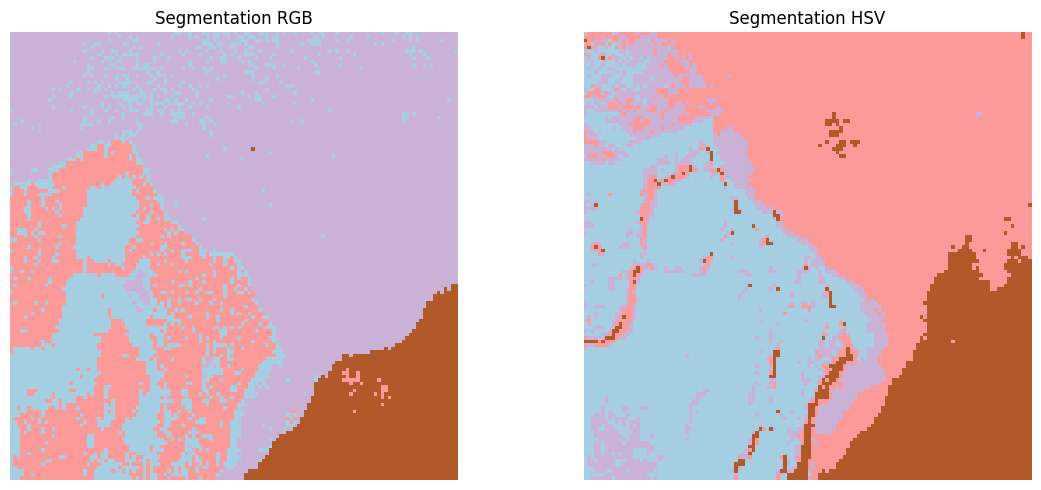

In [70]:
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(clustered_rgb, cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
axes[1].imshow(clustered_hsv, cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
plt.tight_layout()

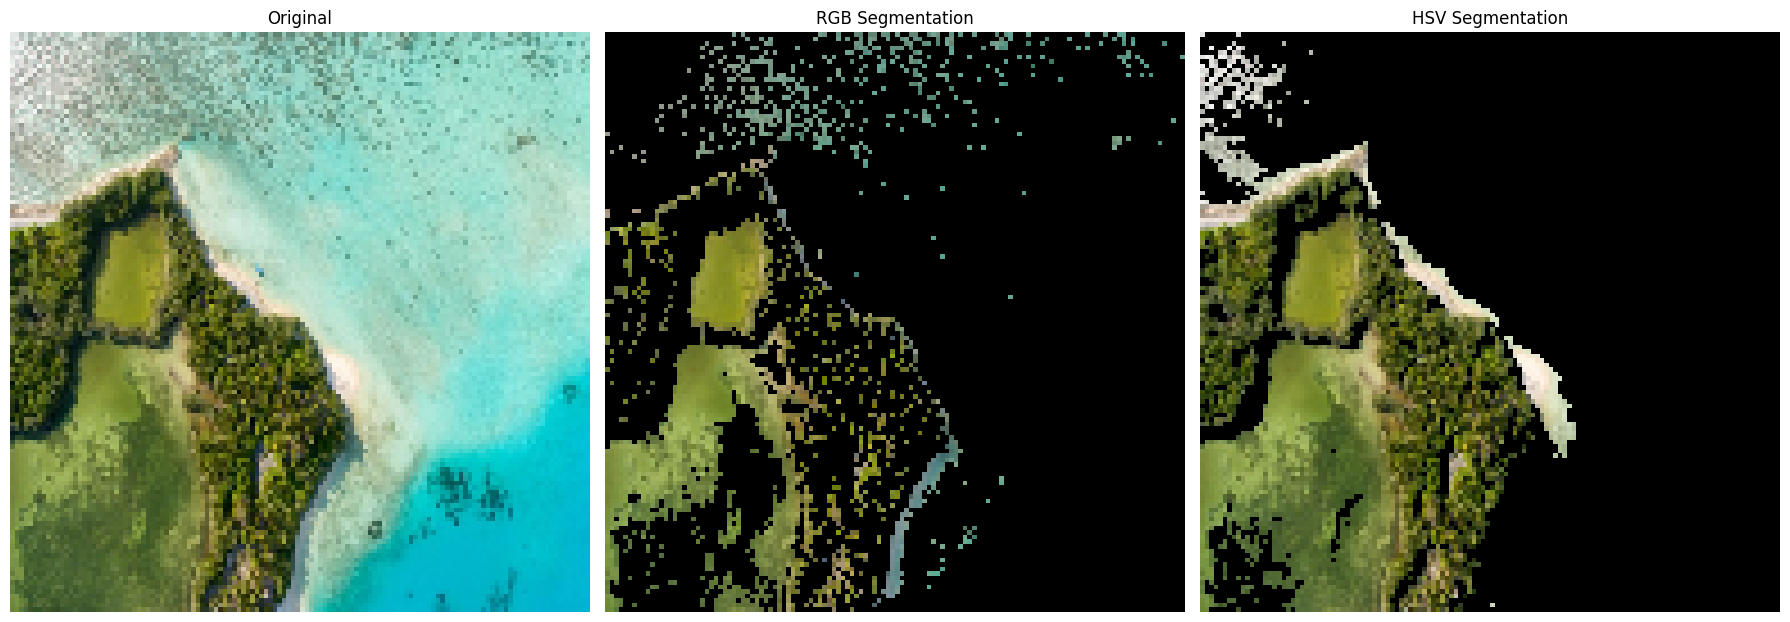

In [71]:
# Mask clusters (turn the rest of pixels into black)
cluster = 0
cluster_mask_rgb = np.array (clustered_rgb == cluster, dtype = np.uint8)

cluster = 0
cluster_mask_hsv = np.array (clustered_hsv == cluster, dtype = np.uint8)

masked_rgb = np.copy(img_rgb)
masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = cluster_mask_rgb )

masked_hsv = np.copy(img_rgb)
masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = cluster_mask_hsv )

_, axes = plt.subplots (1, 3, figsize = (18,8))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
plt.tight_layout()

# **Elbow and Silhouette**

Perform an analysis based on elbow and silhouette to determine the best number of clusters

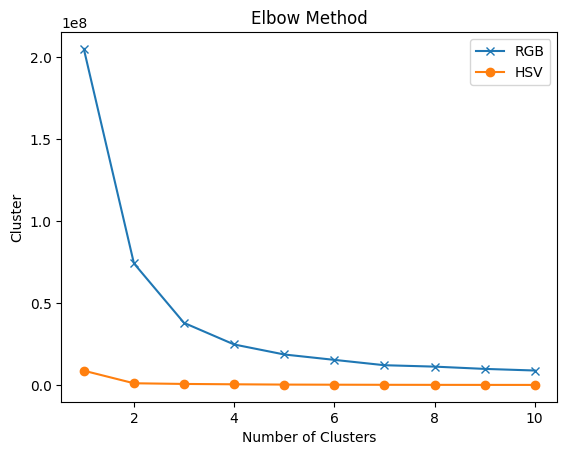

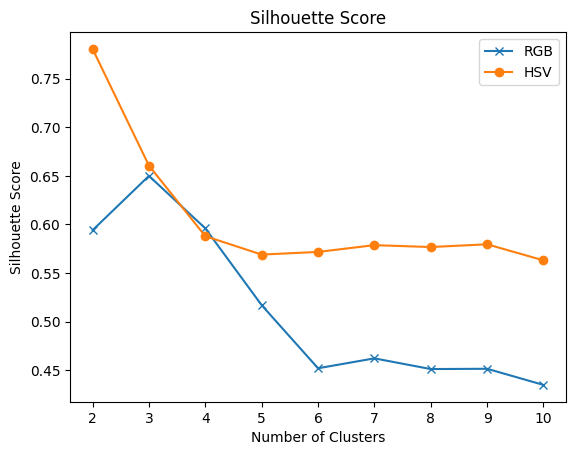

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


cluster_rgb = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(vectorized_rgb)
    cluster_rgb.append(kmeans.inertia_)


silhouette_scores_rgb = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(vectorized_rgb)
    labels = kmeans.labels_
    silhouette_scores_rgb.append(silhouette_score(vectorized_rgb, labels))


cluster_hsv = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(vectorized_hsv)
    cluster_hsv.append(kmeans.inertia_)


silhouette_scores_hsv = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(vectorized_hsv)
    labels = kmeans.labels_
    silhouette_scores_hsv.append(silhouette_score(vectorized_hsv, labels))


plt.plot(range(1, 11), cluster_rgb, marker='x', label='RGB')
plt.plot(range(1, 11), cluster_hsv, marker='o', label='HSV')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster')
plt.legend()
plt.show()


plt.plot(range(2, 11), silhouette_scores_rgb, marker='x', label='RGB')
plt.plot(range(2, 11), silhouette_scores_hsv, marker='o', label='HSV')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# **In random images**


Repeat the segmentation with the following images:
 - [fr1.png](https://drive.google.com/file/d/18OR0DEx-rXeVBeqgbZqhzXXyOQhMyefb/view?usp=sharing)
 - [fr2.png](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr3.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr4.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
